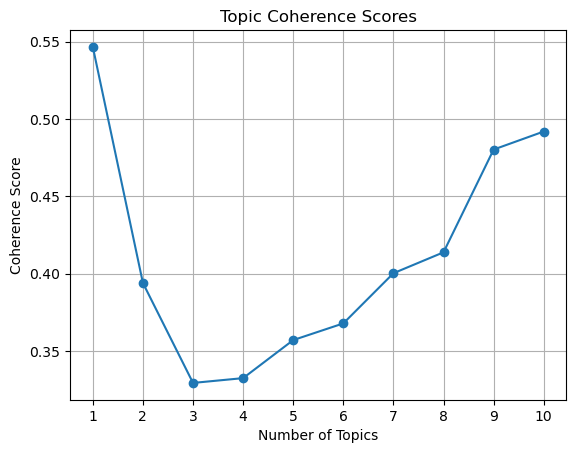

In [1]:
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel
import matplotlib.pyplot as plt

# Sample medical transcripts (replace with your actual transcripts)
medical_transcripts = [
    "Patient presented with symptoms of cough and shortness of breath.",
    "Physical examination revealed elevated temperature and wheezing.",
    "Diagnosis confirmed as bronchitis, prescribed antibiotics and inhaler.",
    "Patient complains of chest pain and difficulty breathing.",
    "Lab results indicate high levels of inflammation.",
    "Treatment plan includes rest, hydration, and pain management.",
    "Patient discharged with instructions to follow up in one week.",
    "Patient history includes hypertension and diabetes.",
    "X-ray shows signs of pneumonia in the left lung.",
    "Administered IV fluids and antibiotics.",
    "Scheduled for follow-up appointment with primary care physician.",
    "Family history of heart disease and asthma.",
    "Performed ECG to monitor heart function.",
    "Patient referred to cardiologist for further evaluation.",
    "Recommend lifestyle changes and medication adherence."
]

# Tokenize the transcripts
tokenized_transcripts = [doc.lower().split() for doc in medical_transcripts]

# Create dictionary and corpus
dictionary = corpora.Dictionary(tokenized_transcripts)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_transcripts]

# Calculate coherence scores for different numbers of topics
coherence_scores = []
for num_topics in range(1, 11):  # Test different numbers of topics
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_transcripts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Plot coherence scores
plt.plot(range(1, 11), coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Topic Coherence Scores')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()
